Calculate the absolute 1762 frequency.

In [2]:
# NIST Wavelengths
c = 2.99792458e10
f2000 = 4873.852*c
f1762 = 5674.807*c
f493 = 20261.561*c
f455 = 21952.404*c

print '1762: ', '{:.7e}'.format(f1762)
print '493: ', '{:.7e}'.format(f493)
print '455: ', '{:.7e}'.format(f455)

1762:  1.7012643e+14
493:  6.0742632e+14
455:  6.5811652e+14


Plot of laser frequency vs time

[765.88709107  -2.16768924   6.46888691]


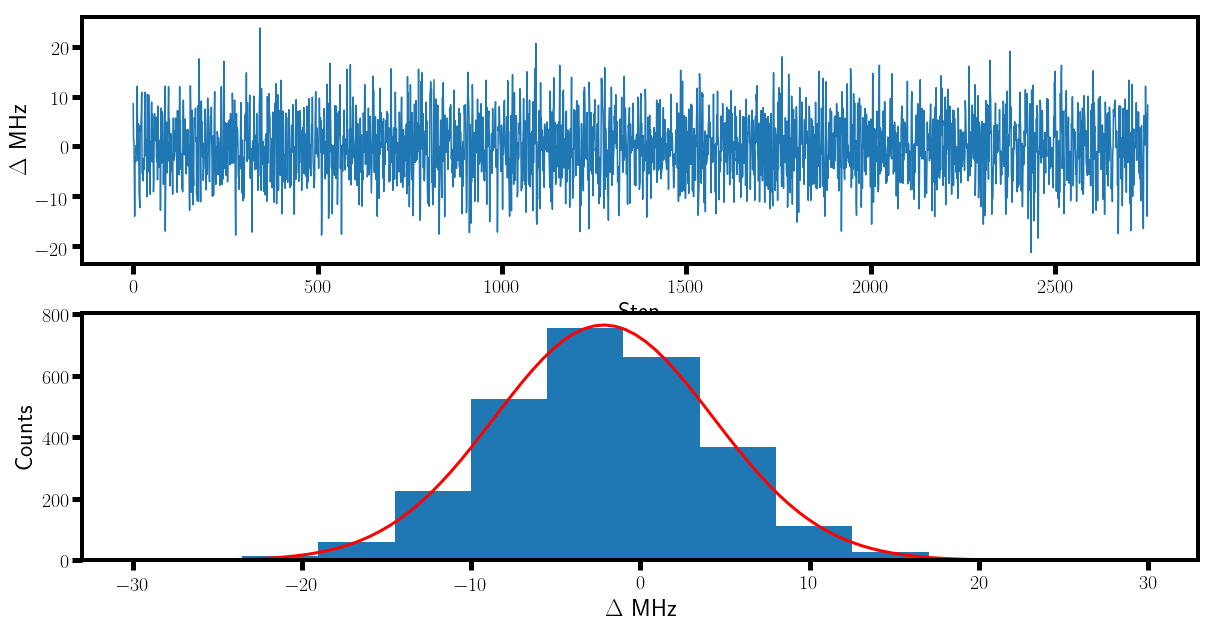

In [5]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 20, 10
from scipy.optimize import curve_fit

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/10.dir/1762_freq_vs_time.csv', delimiter = ',')
delta = (data - 170.126400)*1e6
x = np.arange(len(data))


subplot(2,1,1)
plot(x,delta)
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlabel('Step', fontsize = 24)
ylabel('$\Delta$ MHz', fontsize = 24)


subplot(2,1,2)
h = hist(delta, align ='left')
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlabel('$\Delta$ MHz', fontsize = 24)
ylabel('Counts', fontsize = 24)

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)
                    
x_data = h[1][:-1]
y_data = h[0]
                    
fit, err = curve_fit(gaussian, x_data, y_data, p0 = [400, 0, 6])
print fit
    
x_fit = np.linspace(-30,30,100)
y_fit = gaussian(x_fit, fit[0], fit[1], fit[2])
plot(x_fit, y_fit, color = 'r', linewidth = 3)

show()

## 1762 Linescan ba-138

10 10
-39.85999998450279


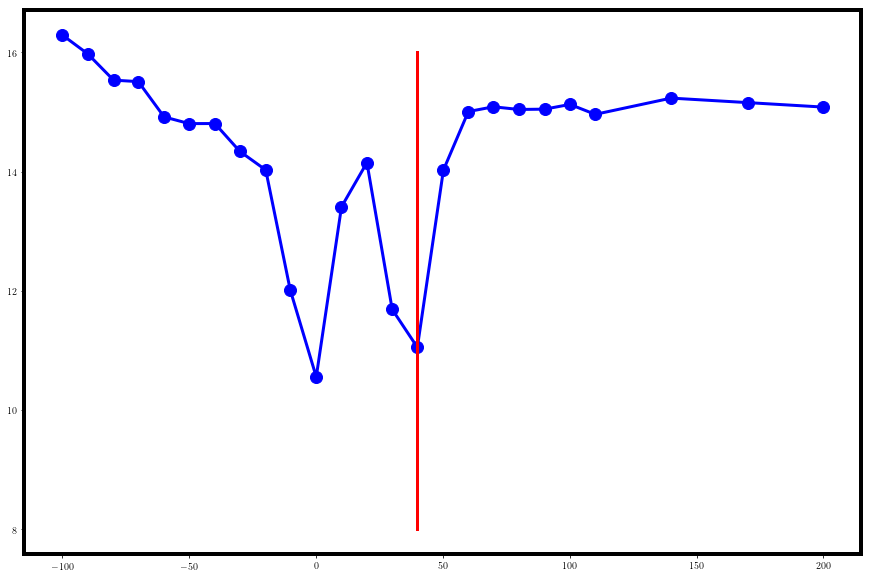

In [6]:
rcParams["figure.figsize"] = 15, 10
data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_01.dir/00008 - Line_Scan.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_01.dir/00009 - Line_Scan.csv', delimiter = ',')

freq = data[:,0]
counts = data[:,1]

freq = (np.append(freq, data1[:,0])-170126400)
counts = np.append(counts, data1[:,1])


n = 14
min1 = np.argmin(counts[:])
min2 = np.argmin(counts[:])
print min2, min1
print freq[10] - freq[14]
plot(freq,counts, 'o', color = 'b', markersize = 12, linewidth = 3)
plot(freq,counts, color = 'b', linewidth = 3)
plot([freq[n],freq[n]], [16,8], color = 'r', linewidth = 3)
show()

### Zeeman Lines Ba-138

gj S1/2:  2.0
gj D5/2:  1.2
-sqrt(6)/6
+/- 2 lines : [-14.784   20.6976 -20.6976  14.784 ]
cg m2 : [0.16666667 0.03333333]
+/- 1 lines : [ -5.9136  11.8272 -11.8272   5.9136]
cg m1 : [0.13333333 0.06666667]


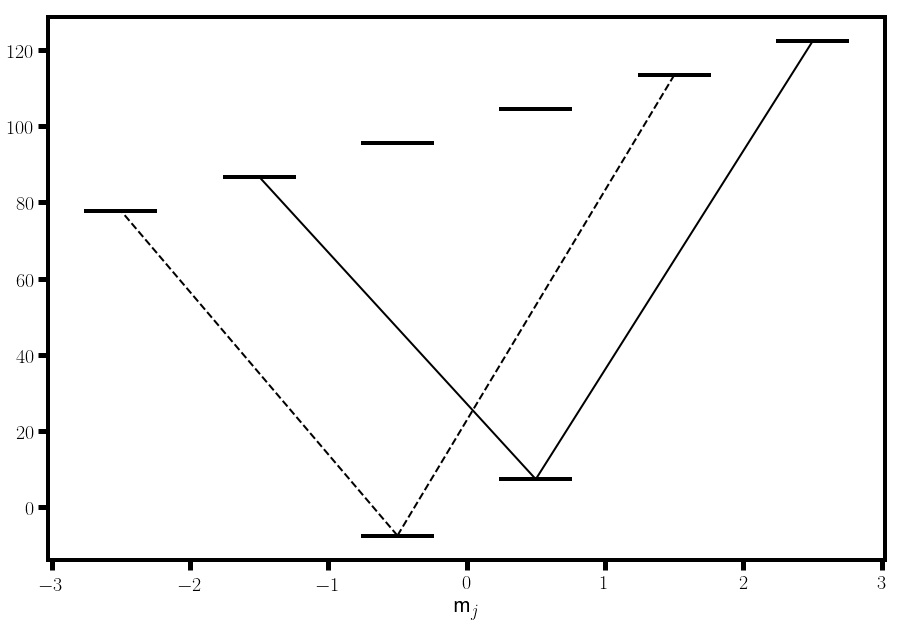

In [56]:
from sympy.physics.wigner import wigner_3j as wig
uB = 1.4 #MHz/G
B = 5.28 #G

# S1/2
SS = 1/2.
SJ = 1/2. 
SL = 0.0

# D5/2
DS = 1/2.
DJ = 5/2.
DL = 2.0

Sgj = 1.5 + (SS*(SS+1)- SL*(SL+1))/2/SJ/(SJ+1)
Dgj = 1.5 + (DS*(DS+1)- DL*(DL+1))/2/DJ/(DJ+1)

print 'gj S1/2: ', Sgj
print 'gj D5/2: ', Dgj

D52 = np.array([-5/2., -3/2., -1/2., 1/2., 3/2., 5/2.])
S12 = np.array([-1/2., 1/2.])

ED = Dgj*uB*B*D52
ES = Sgj*uB*B*S12

m_2_lines1 = [ED[0],ED[4]] - ES[0] 
m_2_lines2 = [ED[1],ED[5]] - ES[1] 

m_1_lines1 = [ED[1],ED[3]] - ES[0]
m_1_lines2 = [ED[2],ED[4]] - ES[1]
 
m_2_lines = np.append(m_2_lines1, m_2_lines2)
m_1_lines = np.append(m_1_lines1, m_1_lines2)

cg_m2_lines1 = np.zeros(len(m_2_lines1))
cg_m1_lines1 = np.zeros(len(m_1_lines1))

# calculate relative transition strengths
cg_m2_lines1[0] = (wig(DJ, 2, SJ, -D52[0], -2., S12[0] ))
cg_m2_lines1[1] = wig(DJ, 2, SJ, -D52[4], 2, S12[0])

cg_m1_lines1[0] = wig(DJ, 2, SJ, -D52[1], -1, S12[0])
cg_m1_lines1[1] = wig(DJ, 2, SJ, -D52[3], 1, S12[0])

print wig(2.5, 2., .5, 2.5, -2., -.5 )

print '+/- 2 lines :', m_2_lines
print 'cg m2 :', cg_m2_lines1**2
print '+/- 1 lines :', m_1_lines
print 'cg m1 :', cg_m1_lines1**2
#Plot energy level diagram
ED = ED + 100
line_w = .5
for i in range(len(ES)):
    plot(np.array([S12[i], S12[i]+line_w]) - line_w/2, [ES[i],ES[i]], color = 'k', linewidth = 4)
    
 

for i in range(len(ED)):
    plot(np.array([D52[i], D52[i]+line_w]) - line_w/2, [ED[i],ED[i]], color = 'k', linewidth = 4)


# plot the allowed transitions for m +/- 2
plot([S12[0],D52[0]],[ES[0],ED[0]], linestyle = '--', color = 'k', linewidth = 2)
plot([S12[0],D52[4]],[ES[0],ED[4]], linestyle = '--', color = 'k', linewidth = 2)

plot([S12[1],D52[1]],[ES[1],ED[1]], color = 'k', linewidth = 2)
plot([S12[1],D52[5]],[ES[1],ED[5]], color = 'k', linewidth = 2)

tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlabel('m$_j$', fontsize = 24)



show()

### 11/7/18 Another 138 linescan with smaller step

170126379.862 170126414.95
35.0879999995
170126397.406


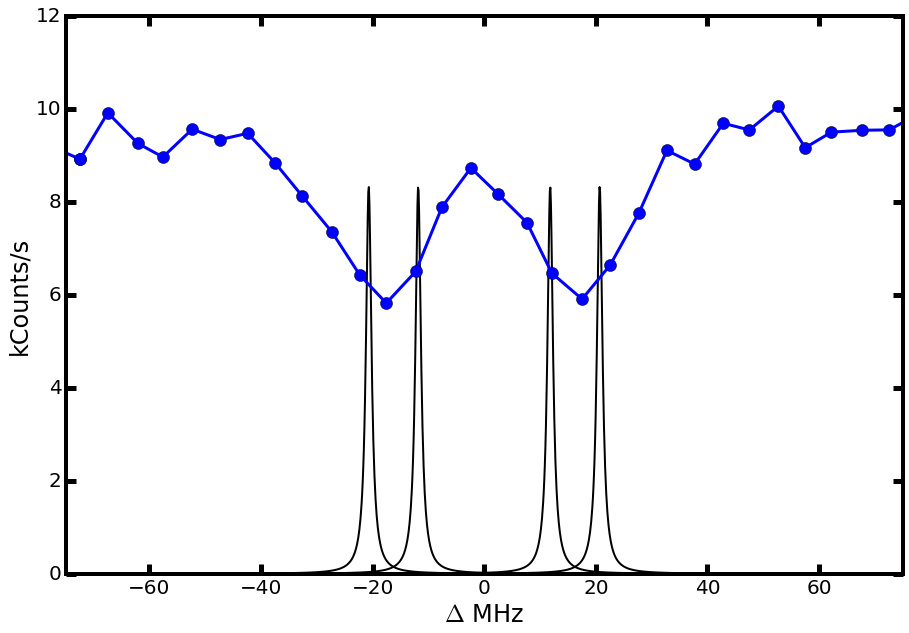

In [5]:
data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00002 - Line_Scan.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00003 - Line_Scan.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00004 - Line_Scan.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00005 - Line_Scan.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00006 - Line_Scan.csv', delimiter = ',')


freq = data[:,0]
counts = data[:,1]

freq = np.concatenate((data3[:,0],data4[:,0],data2[:,0],data[:,0], data1[:,0]))
counts = np.concatenate((data3[:,1],data4[:,1], data2[:,1],data[:,1], data1[:,1]))

def lorentz(x, gamma, omega0):
    return 5*(gamma/2)/((x-omega0)**2 + (gamma/2)**2)

gamma = 1.2

x = np.linspace(-50,50,1000)


m2 = np.array([lines[3],lines[4],lines[5],lines[6]])
for i in range(len(m2)):
    y = lorentz(x,gamma,m2[i])
    plot(x, y, color = 'k', linewidth = 2)

n = 19
min1 = np.argmin(counts[:n])
min2 = np.argmin(counts[n:])
print freq[min1], freq[min2+n]
print freq[min2+n] - freq[min1]
freq_0 = (freq[min2+n] + freq[min1])/2
print freq_0
freq = freq - freq_0
plot(freq,counts, 'o', color = 'b', markersize = 12, linewidth = 3)
plot(freq,counts, color = 'b', linewidth = 3)
#plot([freq[min1],freq[min1]], [10,0], color = 'r', linewidth = 3)
#plot([freq[min2+n],freq[min2+n]], [10,0], color = 'r', linewidth = 3)
xlabel('$\Delta$ MHz', fontsize = 24)
ylabel('kCounts/s', fontsize = 24)
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlim([-75,75])
show()

170126384.878 170126444.922
60.0439999998


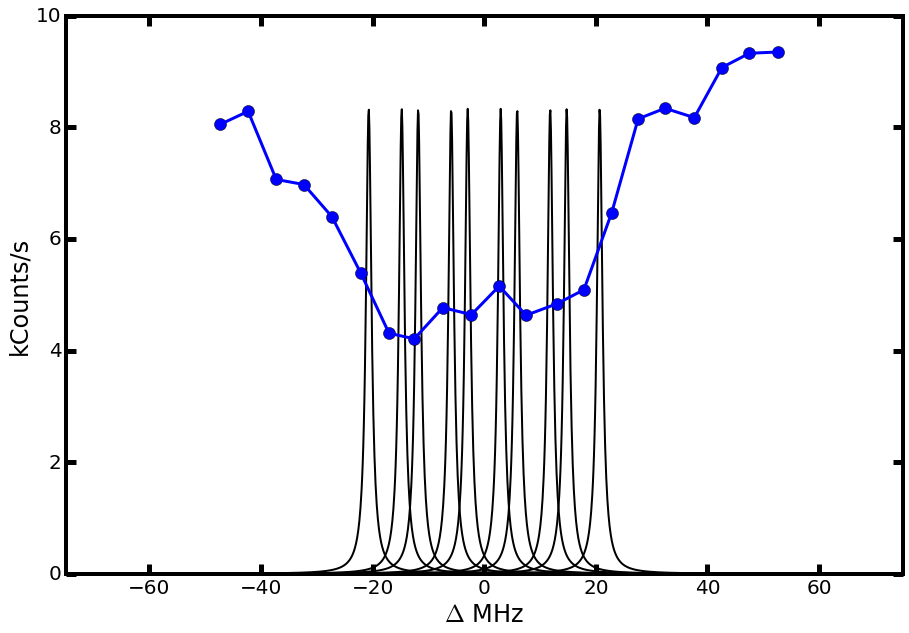

In [6]:
data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_07.dir/00007 - Line_Scan.csv', delimiter = ',')



freq = data[:,0]
counts = data[:,1]

#freq = np.concatenate((data3[:,0],data4[:,0],data2[:,0],data[:,0], data1[:,0]))
#counts = np.concatenate((data3[:,1],data4[:,1], data2[:,1],data[:,1], data1[:,1]))

def lorentz(x, gamma, omega0):
    return 5*(gamma/2)/((x-omega0)**2 + (gamma/2)**2)

gamma = 1.2

x = np.linspace(-50,50,1000)

m2 = np.array([lines[3],lines[4],lines[5],lines[6]])
for i in range(len(lines)):
    y = lorentz(x,gamma,lines[i])
    plot(x, y, color = 'k', linewidth = 2)

n = 19
min1 = np.argmin(counts[:n])
min2 = np.argmin(counts[n:])
print freq[min1], freq[min2+n]
print freq[min2+n] - freq[min1]
freq = freq - freq_0
plot(freq,counts, 'o', color = 'b', markersize = 12, linewidth = 3)
plot(freq,counts, color = 'b', linewidth = 3)
#plot([freq[min1],freq[min1]], [10,0], color = 'r', linewidth = 3)
#plot([freq[min2+n],freq[min2+n]], [10,0], color = 'r', linewidth = 3)
xlabel('$\Delta$ MHz', fontsize = 24)
ylabel('kCounts/s', fontsize = 24)
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlim([-75,75])
show()

## Ba-133 Lines

For the first scan we will have the b-field, k vector, and polarization all orthognal to each other. This only allows $\Delta$m = $\pm$2. 

[-13.29912    -3.01972     7.3021257  17.67048  ]
[-20.68908035 -10.40968035  -0.08783465  10.28051965  20.70011965]
[-17.81068    -7.4888343   2.87952    13.29912  ]


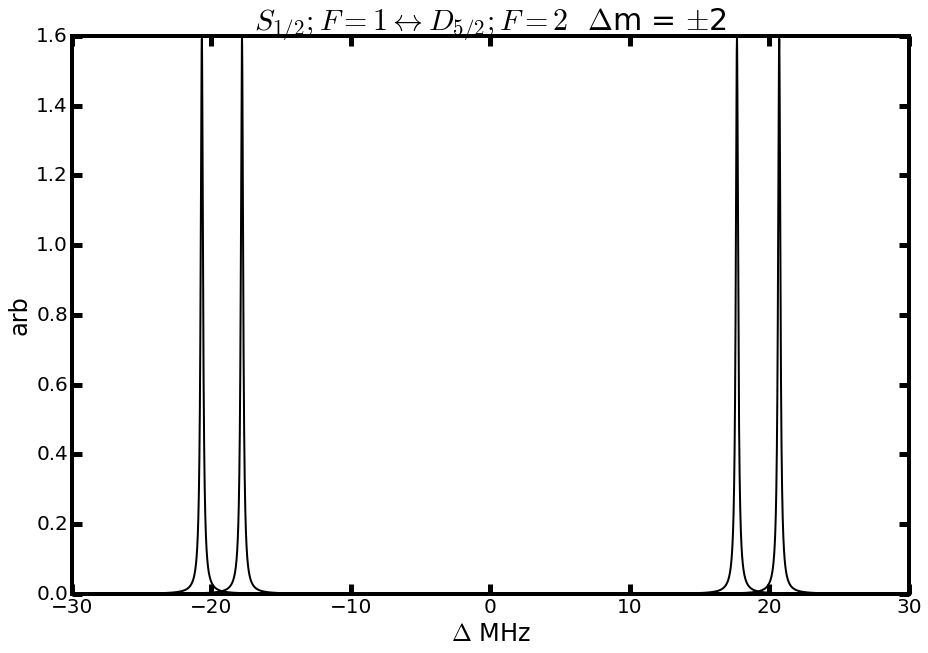

In [203]:
# Use mathematica notebook to generate frequencies from Breit-Rabi formula

ES12F1 = np.array([-7.39548, -0.00551965, 7.39548])
ED52F3 = np.array([70.8245, 78.3269, 85.7903, 93.2114, 100.586, 107.909, 115.176])
ED52F2 = np.array([-20.6946, -10.4152, -0.0933543, 10.275, 20.6946])

mS = np.arange(-1., 2., 1)
mDF2 = np.arange(-2., 3., 1)
mDF3 = np.arange(-3.,4., 1)


# First plot all the lines

linesF3F1m1 = np.array(ED52F3[:5] - ES12F1[0])
linesF3F10 = np.array(ED52F3[1:6] - ES12F1[1])
linesF3F11 = np.array(ED52F3[2:] - ES12F1[2])

linesF2F1m1 = np.array(ED52F2[:4] -ES12F1[0])
linesF2F10 = np.array(ED52F2 -ES12F1[1])
linesF2F11 = np.array(ED52F2[1:] -ES12F1[2])

print linesF2F1m1
print linesF2F10
print linesF2F11


# Pick out lines for delta m = +/- 2

m2lines = np.array([linesF3F1m1[0], linesF3F1m1[4], linesF3F10[0], linesF3F10[4], linesF3F11[0], linesF3F11[4], \
                   linesF2F1m1[3], linesF2F10[0], linesF2F10[4], linesF2F11[0]])

def lorentz(x, gamma, omega0):
    return (gamma/2)/((x-omega0)**2 + (gamma)**2)/np.pi

gamma = .1

x = np.linspace(-50,150,100000)
for i in range(6,10):
    plot(x, lorentz(x, gamma, m2lines[i]), color = 'k', linewidth = 2)

xlabel('$\Delta$ MHz', fontsize = 24)
ylabel('arb', fontsize = 24)
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlim([-30,30])
title('$S_{1/2};F=1 \leftrightarrow D_{5/2};F=2$  $\Delta$m = $\pm$2', fontsize = 30)
show()

[-13.29912    -3.01972     7.3021257  17.67048  ]
[-20.68908035 -10.40968035  -0.08783465  10.28051965  20.70011965]
[-17.81068    -7.4888343   2.87952    13.29912  ]


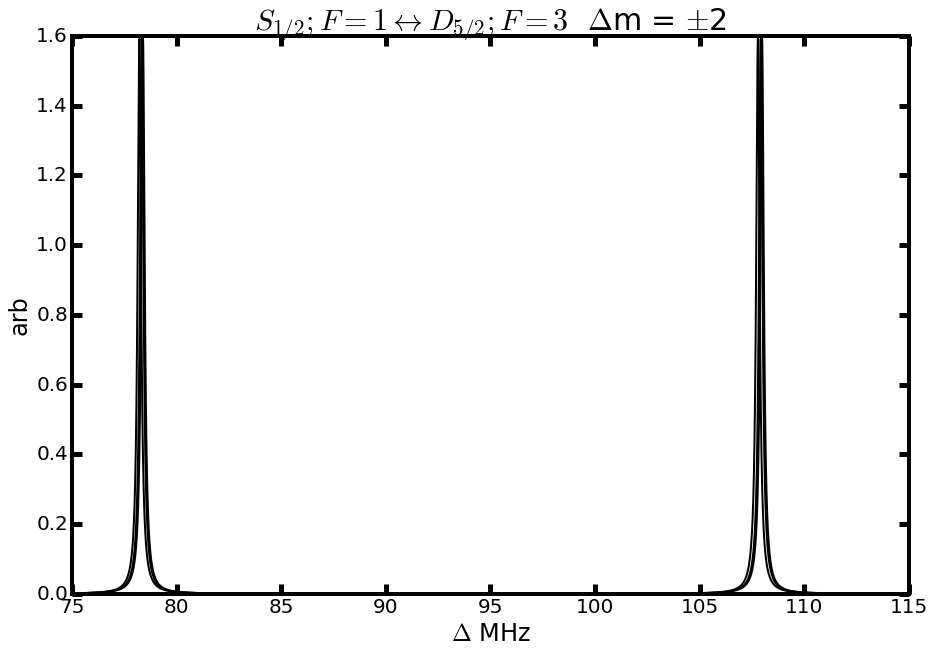

In [204]:
# Use mathematica notebook to generate frequencies from Breit-Rabi formula

ES12F1 = np.array([-7.39548, -0.00551965, 7.39548])
ED52F3 = np.array([70.8245, 78.3269, 85.7903, 93.2114, 100.586, 107.909, 115.176])
ED52F2 = np.array([-20.6946, -10.4152, -0.0933543, 10.275, 20.6946])

mS = np.arange(-1., 2., 1)
mDF2 = np.arange(-2., 3., 1)
mDF3 = np.arange(-3.,4., 1)


# First plot all the lines

linesF3F1m1 = np.array(ED52F3[:5] - ES12F1[0])
linesF3F10 = np.array(ED52F3[1:6] - ES12F1[1])
linesF3F11 = np.array(ED52F3[2:] - ES12F1[2])

linesF2F1m1 = np.array(ED52F2[:4] -ES12F1[0])
linesF2F10 = np.array(ED52F2 -ES12F1[1])
linesF2F11 = np.array(ED52F2[1:] -ES12F1[2])

print linesF2F1m1
print linesF2F10
print linesF2F11


# Pick out lines for delta m = +/- 2

m2lines = np.array([linesF3F1m1[0], linesF3F1m1[4], linesF3F10[0], linesF3F10[4], linesF3F11[0], linesF3F11[4], \
                   linesF2F1m1[3], linesF2F10[0], linesF2F10[4], linesF2F11[0]])

def lorentz(x, gamma, omega0):
    return (gamma/2)/((x-omega0)**2 + (gamma)**2)/np.pi

gamma = .1

x = np.linspace(-50,150,100000)
for i in range(6):
    plot(x, lorentz(x, gamma, m2lines[i]), color = 'k', linewidth = 2)

xlabel('$\Delta$ MHz', fontsize = 24)
ylabel('arb', fontsize = 24)
tick_params(labelsize = 20)
tick_params(width=5, length=10)
xlim([75,115])
title('$S_{1/2};F=1 \leftrightarrow D_{5/2};F=3$  $\Delta$m = $\pm$2', fontsize = 30)
show()

94.5600000024


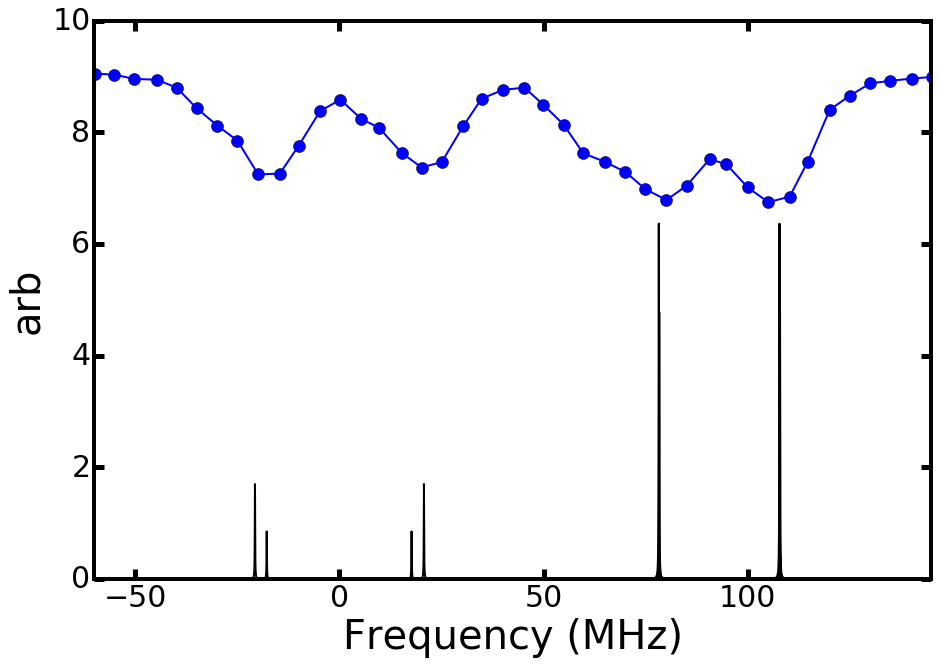

In [46]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
data = np.loadtxt('H:/Data/2018.dir/11.dir/2018_11_09.dir/00026 - Line_Scan.csv', delimiter = ',')
data1 = np.loadtxt('H:/Data/2018.dir/11.dir/2018_11_09.dir/00024 - Line_Scan.csv', delimiter = ',')
data2 = np.loadtxt('H:/Data/2018.dir/11.dir/2018_11_09.dir/00025 - Line_Scan.csv', delimiter = ',')



freq =  np.concatenate((data[:,0],data1[:,0],data2[:,0])) - 170128995 
counts = np.concatenate((data[:,1],data1[:,1],data2[:,1]))

# Use mathematica notebook to generate frequencies from Breit-Rabi formula

ES12F1 = np.array([-7.39548, -0.00551965, 7.39548])
ED52F3 = np.array([70.8245, 78.3269, 85.7903, 93.2114, 100.586, 107.909, 115.176])
ED52F2 = np.array([-20.6946, -10.4152, -0.0933543, 10.275, 20.6946])

mS = np.arange(-1., 2., 1)
mDF2 = np.arange(-2., 3., 1)
mDF3 = np.arange(-3.,4., 1)


# First plot all the lines

linesF3F1m1 = np.array(ED52F3[:5] - ES12F1[0])
linesF3F10 = np.array(ED52F3[1:6] - ES12F1[1]) 
linesF3F11 = np.array(ED52F3[2:] - ES12F1[2])

linesF2F1m1 = np.array(ED52F2[:4] -ES12F1[0])
linesF2F10 = np.array(ED52F2 -ES12F1[1]) 
linesF2F11 = np.array(ED52F2[1:] -ES12F1[2])


#print linesF3F10
#print linesF2F11


# Pick out lines for delta m = +/- 2

m2lines = np.array([linesF3F1m1[0], linesF3F1m1[4], linesF3F10[0], linesF3F10[4], linesF3F11[0], linesF3F11[4], \
                   linesF2F1m1[3], linesF2F10[0], linesF2F10[4], linesF2F11[0]])

#print m2lines

amp = np.array([1./np.sqrt(6), 1./3/np.sqrt(10), 1./2/np.sqrt(2), 1./2/np.sqrt(2), 1./3/np.sqrt(10), 1./np.sqrt(6), \
               1./3/np.sqrt(5), 1./3*np.sqrt(2./5), 1./3*np.sqrt(2./5), 1./3/np.sqrt(5)])**2

def lorentz(x, gamma, omega0, amplitude):
    return amplitude*6*(gamma/2.)/((x-omega0)**2 + (gamma/2.)**2)/np.pi

gamma = .1

x = np.linspace(-50,150,100000)
for i in range(len(m2lines)):
    plot(x, lorentz(x, gamma, m2lines[i], amp[i]), color = 'k', linewidth = 2)

n = 44

print freq[44] - freq[25]
plot(freq,counts, 'o', color = 'b', markersize = 12)
plot(freq,counts, color = 'b', linewidth = 2)
#plot([freq[n],freq[n]],[0,10], color = 'r', linewidth = 2)
xlabel('Frequency (MHz)', fontsize = 40)
ylabel('arb', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlim([-60,145])
show()
#savefig('1762_scan_delta_m2.png', bbox_inches='tight')
#savefig('1762_scan_delta_m2.pdf', bbox_inches='tight')
#savefig('1762_scan_delta_m2.eps', bbox_inches='tight', format='eps', dpi = 1000)

| F      | F'     | m | m'| CG | CG$^2$ | $\Delta$ f (MHz)|
|--------|--------|--------|--------|--------|-------|-------|
| 1 | 2 | -1 | 1  | $\frac{-1}{3\sqrt{5}}$| .022 | 17.6 |
| 1 | 2 | 0 | 2  | $\frac{-1}{3}\sqrt{\frac{2}{5}}$| .04| 20.7|
| 1 | 2 | 0 | -2  | $\frac{-1}{3}\sqrt{\frac{2}{5}}$| .04 | -20.7|
| 1 | 2 | 1 | -1  | $\frac{-1}{3\sqrt{5}}$| .022 | -17.6|
| 1 | 3 | -1 | 1  | $\frac{-1}{3\sqrt{10}}$| .01 | 15.0 |
| 1 | 3 | -1 | -3  | $\frac{-1}{\sqrt{6}}$| .16 | -14.6 |
| 1 | 3 | 0 | -2  | $\frac{-1}{3\sqrt{2}}$| .055 | -14.6 |
| 1 | 3 | 0 | 2  | $\frac{-1}{3\sqrt{2}}$| .055 | 14.9 |
| 1 | 3 | 1 | -1  | $\frac{-1}{3\sqrt{10}}$| .01 | -14.6 |
| 1 | 3 | 1 | 3  | $\frac{-1}{\sqrt{6}}$| .16 | 14.78 |
| 1 | 3 | 1 | 1  | $\frac{1}{\sqrt{15}}$| .0666 | 0 |
| 1 | 3 | 0 | 0  | $\frac{-1}{\sqrt{10}}$| .1 | 0 |
| 1 | 3 | -1 | -1  | $\frac{-1}{\sqrt{15}}$| .0666 | 0 |
| 1 | 3 | -1 | 0 | $\frac{-1}{\sqrt{30}}$| .0888 | 0 |
| 1 | 3 | 0 | 1  | $\frac{2}{3\sqrt{5}}$| .0888 | 0 |
| 1 | 3 | 1 | 2  | $\frac{1}{\sqrt{3}}$| .0333 | 0 |
|<img width=100/>|<img width=100/> |<img width=100/>|<img width=100/>|<img width=100/>|<img width=100/>|


### 1762 nm Scan (narrow light) 

F = 3; mF = 2:  -13.69
F = 3; mF = 1:  -6.70
F = 3; mF = -1:  6.80
F = 3; mF = -2:  13.70
F = 2; mF =  2:  -19.16
F = 2; mF =  -2:  19.16
Estimated Hypdefine Splitting  89.45 MHz
Estimated Hypdefine Splitting Uncertainty 0.04 MHz


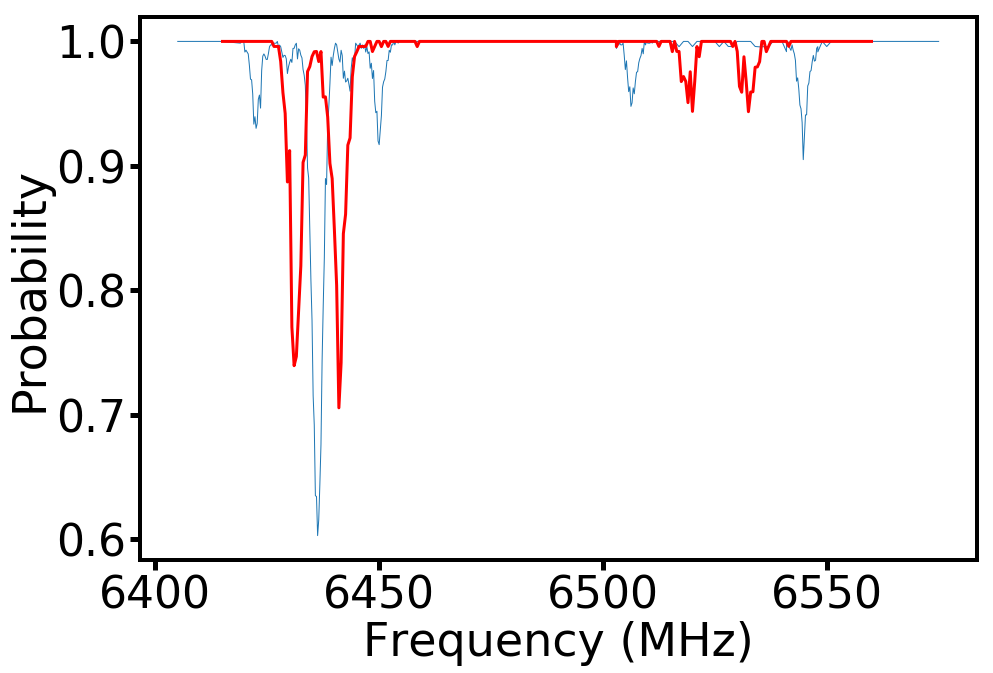

In [74]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
from scipy.optimize import curve_fit
# Read in the data

data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00167 - E2LaserSweep_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00143 - E2LaserSweep_prob.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00152 - E2LaserSweep_prob.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00155 - E2LaserSweep_prob.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00158 - E2LaserSweep_prob.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00161 - E2LaserSweep_prob.csv', delimiter = ',')
data6 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00164 - E2LaserSweep_prob.csv', delimiter = ',')

def gauss(x, A, mu, sigma):
    return 1 - A*np.exp(-(x-mu)**2/2/sigma**2)


freq = np.concatenate((data[:-5,0], data1[:,0],data2[:,0], data3[:,0],data4[:,0],data5[:,0],data6[:,0]))
amp = np.concatenate((data[:-5,1], data1[:,1],data2[:,1], data3[:,1],data4[:,1],data5[:,1],data6[:,1]))
start1 = 55
start2 = 200
start3 = 265
start4 = 12
start5 = 35
start6 = 90
start7 = 120
window  =60

freq_fit1 = freq[start1:start1+window]
amp_fit1 = amp[start1:start1+window]

freq_fit2 = freq[start2:start2+window]
amp_fit2 = amp[start2:start2+window]

freq_fit3 = freq[start3:start3+window]
amp_fit3 = amp[start3:start3+window]

freq_fit4 = freq[start4:start4+window]
amp_fit4 = amp[start4:start4+window]

freq_fit5 = freq[start5:start5+window]
amp_fit5 = amp[start5:start5+window]

freq_fit6 = freq[start6:start6+window]
amp_fit6 = amp[start6:start6+window]

freq_fit7 = freq[start7:start7+window]
amp_fit7 = amp[start7:start7+window]

p0 = [.4, 6440, 2]
fit1, err = curve_fit(gauss,freq_fit1, amp_fit1, p0 )
DF3_0 = fit1[1] 
DF3_0_err = np.sqrt(err[2,2])
#print DF3_0_err
y_fit1 = gauss(freq_fit1, fit1[0],fit1[1], fit1[2])
y_guess1 = gauss(freq_fit1, p0[0],p0[1],p0[2])

p0 = [.1, 6505, 2]
fit2, err = curve_fit(gauss,freq_fit2, amp_fit2, p0 )
DF2_2 =  fit2[1]
DF2_2_err = np.sqrt(err[2,2])
y_fit2 = gauss(freq_fit2, fit2[0],fit2[1], fit2[2])
y_guess2 = gauss(freq_fit2, p0[0],p0[1],p0[2])

p0 = [.1, 6545, 2]
fit3, err = curve_fit(gauss,freq_fit3, amp_fit3, p0 )
DF2_m2 = fit3[1]
DF2_m2_err = np.sqrt(err[2,2])
y_fit3 = gauss(freq_fit3, fit3[0],fit3[1], fit3[2])
y_guess3 = gauss(freq_fit3, p0[0],p0[1],p0[2])

p0 = [.05, 6423, 2]
fit4, err = curve_fit(gauss,freq_fit4, amp_fit4, p0 )
DF3_2 =  fit4[1]
y_fit4 = gauss(freq_fit4, fit4[0],fit4[1], fit4[2])
y_guess4 = gauss(freq_fit4, p0[0],p0[1],p0[2])

p0 = [.02, 6429.5, 1]
#fit5, err = curve_fit(gauss,freq_fit5, amp_fit5, p0 )
DF3_1 =  6429.5
#y_fit5 = gauss(freq_fit5, fit5[0],fit5[1], fit5[2])
y_guess5 = gauss(freq_fit5, p0[0],p0[1],p0[2])

p0 = [.03, 6443, 1]
#fit6, err = curve_fit(gauss,freq_fit6, amp_fit6, p0 )
DF3_m1 =  6443.
#y_fit6 = gauss(freq_fit6, fit6[0],fit6[1], fit6[2])
y_guess6 = gauss(freq_fit6, p0[0],p0[1],p0[2])

p0 = [.05, 6450, 2]
fit7, err = curve_fit(gauss,freq_fit7, amp_fit7, p0 )
DF3_m2 =  fit7[1]
y_fit7 = gauss(freq_fit7, fit7[0],fit7[1], fit7[2])
y_guess7 = gauss(freq_fit7, p0[0],p0[1],p0[2])


plot(freq, amp, linewidth = 1)
#plot(freq_fit1, y_fit1, color = 'k', linestyle = '--', linewidth = 3)
#plot(freq_fit, y_guess, color = 'b', linestyle = '--')

#plot(freq_fit2, y_fit2, color = 'k', linestyle = '--', linewidth = 3)
#plot(freq_fit2, y_guess2, color = 'b', linestyle = '--')

#plot(freq_fit3, y_fit3, color = 'k', linestyle = '--', linewidth = 3)
#plot(freq_fit3, y_guess3, color = 'b', linestyle = '--')

#plot(freq_fit4, y_fit4, color = 'k', linestyle = '--')
#plot(freq_fit4, y_guess4, color = 'b', linestyle = '--')


#plot(freq_fit5, y_fit5, color = 'k', linestyle = '--')
#plot(freq_fit5, y_guess5, color = 'k', linestyle = '--')

#plot(freq_fit6, y_fit6, color = 'k', linestyle = '--')
#plot(freq_fit6, y_guess6, color = 'k', linestyle = '--')

#plot(freq_fit7, y_fit7, color = 'k', linestyle = '--')
#plot(freq_fit7, y_guess7, color = 'b', linestyle = '--')


print 'F = 3; mF = 2: ', '{:.2f}'.format(DF3_2- DF3_0)
print 'F = 3; mF = 1: ', '{:.2f}'.format(DF3_1- DF3_0)
#print 'F = 3; mF = 0: ', '{:.2f}'.format(DF3_m1- DF3_0)
print 'F = 3; mF = -1: ', '{:.2f}'.format(DF3_m1- DF3_0)
print 'F = 3; mF = -2: ', '{:.2f}'.format(DF3_m2- DF3_0)
F2_avg = (DF2_m2 + DF2_2)/2
print 'F = 2; mF =  2: ', '{:.2f}'.format(DF2_2 - F2_avg)
print 'F = 2; mF =  -2: ', '{:.2f}'.format(DF2_m2 - F2_avg)
print 'Estimated Hypdefine Splitting ', '{:.2f}'.format(F2_avg -  DF3_0), 'MHz'
# Calc HF error estimate
HF_err = np.sqrt(DF2_2_err**2/4 + DF2_m2_err**2/4 + DF3_0_err**2)
print 'Estimated Hypdefine Splitting Uncertainty', '{:.2f}'.format(HF_err), 'MHz'



xlabel('Frequency (MHz)', fontsize = 46)
ylabel('Probability', fontsize = 46)
tick_params(labelsize = 44)
tick_params(width=5, length=10)


data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00170 - E2LaserSweep_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00173 - E2LaserSweep_prob.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00176 - E2LaserSweep_prob.csv', delimiter = ',')


freq = np.concatenate((data[:,0], data1[:,0],data2[:,0]))
amp = np.concatenate((data[:,1], data1[:,1],data2[:,1]))

freq = np.concatenate((data[:,0], data1[:,0],data2[:,0]))
sort_ind = np.argsort(freq)
freq = freq[sort_ind]
amp = np.concatenate((data[:,1], data1[:,1],data2[:,1]))
amp = amp[sort_ind]

plot(freq, amp,linewidth = '3',color = 'r')
xlabel('Frequency (MHz)', fontsize = 46)
ylabel('Probability', fontsize = 46)
tick_params(labelsize = 44)
tick_params(width=5, length=10)

show() 


#savefig('1762_scan_narrow_delta_m1.png', bbox_inches='tight', transparent = True)

F = 3; mF = 1:  -4.85
F = 3; mF = -1:  4.85
F = 2; mF =  1:  -6.67
F = 2; mF =  -1:  6.67
Estimated Hypdefine Splitting  89.61 MHz
Estimated Hypdefine Splitting Uncertainty 0.21 MHz


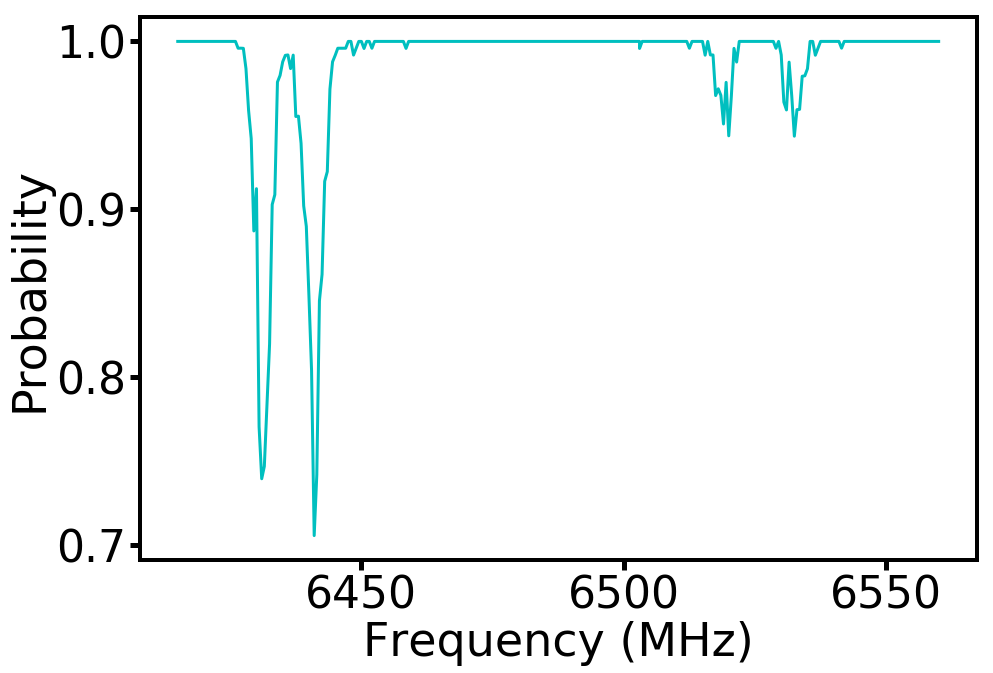

In [50]:
# with vert b-field
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
from scipy.optimize import curve_fit
# Read in the data
data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00170 - E2LaserSweep_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00173 - E2LaserSweep_prob.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/09.dir/2020_09_08.dir/00176 - E2LaserSweep_prob.csv', delimiter = ',')


freq = np.concatenate((data[:,0], data1[:,0],data2[:,0]))
sort_ind = np.argsort(freq)
freq = freq[sort_ind]
amp = np.concatenate((data[:,1], data1[:,1],data2[:,1]))
amp = amp[sort_ind]


start1 = 25
start2 = 40
start3 = 130
start4 = 155
window  = 40

freq_fit1 = freq[start1:start1+window]
amp_fit1 = amp[start1:start1+window]

freq_fit2 = freq[start2:start2+window]
amp_fit2 = amp[start2:start2+window]

freq_fit3 = freq[start3:start3+window]
amp_fit3 = amp[start3:start3+window]

freq_fit4 = freq[start4:start4+window]
amp_fit4 = amp[start4:start4+window]

p0 = [.3, 6431, 2]
fit1, err = curve_fit(gauss,freq_fit1, amp_fit1, p0 )
DF3_1 = fit1[1] 
DF3_1_err = np.sqrt(err[2,2])
#print DF3_0_err
y_fit1 = gauss(freq_fit1, fit1[0],fit1[1], fit1[2])
y_guess1 = gauss(freq_fit1, p0[0],p0[1],p0[2])

p0 = [.3, 6440, 2]
fit2, err = curve_fit(gauss,freq_fit2, amp_fit2, p0 )
DF3_m1 =  fit2[1]
DF3_m1_err = np.sqrt(err[2,2])
y_fit2 = gauss(freq_fit2, fit2[0],fit2[1], fit2[2])
y_guess2 = gauss(freq_fit2, p0[0],p0[1],p0[2])

p0 = [.05, 6520, 2]
fit3, err = curve_fit(gauss,freq_fit3, amp_fit3, p0 )
DF2_1 = fit3[1]
DF2_1_err = np.sqrt(err[2,2])
y_fit3 = gauss(freq_fit3, fit3[0],fit3[1], fit3[2])
y_guess3 = gauss(freq_fit3, p0[0],p0[1],p0[2])

p0 = [.05, 6533, 2]
fit4, err = curve_fit(gauss,freq_fit4, amp_fit4, p0 )
DF2_m1 =  fit4[1]
DF2_m1_err = np.sqrt(err[2,2])
y_fit4 = gauss(freq_fit4, fit4[0],fit4[1], fit4[2])
y_guess4 = gauss(freq_fit4, p0[0],p0[1],p0[2])


plot(freq, amp, linewidth = 3, color = 'c')
#plot(freq_fit1, y_fit1, color = 'k', linestyle = '--')
#plot(freq_fit1, y_guess1, color = 'b', linestyle = '--')

#plot(freq_fit2, y_fit2, color = 'k', linestyle = '--')
#plot(freq_fit2, y_guess2, color = 'r', linestyle = '--')

#plot(freq_fit3, y_fit3, color = 'k', linestyle = '--')
#plot(freq_fit3, y_guess3, color = 'g', linestyle = '--')

#plot(freq_fit4, y_fit4, color = 'k', linestyle = '--')
#plot(freq_fit4, y_guess4, color = 'k', linestyle = '--')


F3_avg = (DF3_m1 + DF3_1)/2
F2_avg = (DF2_m1 + DF2_1)/2
print 'F = 3; mF = 1: ', '{:.2f}'.format(DF3_1- F3_avg)
print 'F = 3; mF = -1: ', '{:.2f}'.format(DF3_m1- F3_avg)
print 'F = 2; mF =  1: ', '{:.2f}'.format(DF2_1 - F2_avg)
print 'F = 2; mF =  -1: ', '{:.2f}'.format(DF2_m1 - F2_avg)
print 'Estimated Hypdefine Splitting ', '{:.2f}'.format(F2_avg -  F3_avg), 'MHz'
# Calc HF error estimate
HF_err = np.sqrt(DF2_1_err**2/4 + DF2_m1_err**2/4 + DF3_1_err**2/4 + DF3_m1_err**2/4)
print 'Estimated Hypdefine Splitting Uncertainty', '{:.2f}'.format(HF_err), 'MHz'


xlabel('Frequency (MHz)', fontsize = 46)
ylabel('Probability', fontsize = 46)
tick_params(labelsize = 44)
tick_params(width=5, length=10)

show()
#savefig('1762_scan_narrow_delta_m1.png', bbox_inches='tight', transparent = True)

### 11/13/20

Possible motion

[0.05460645 1.66166617 0.76330933]


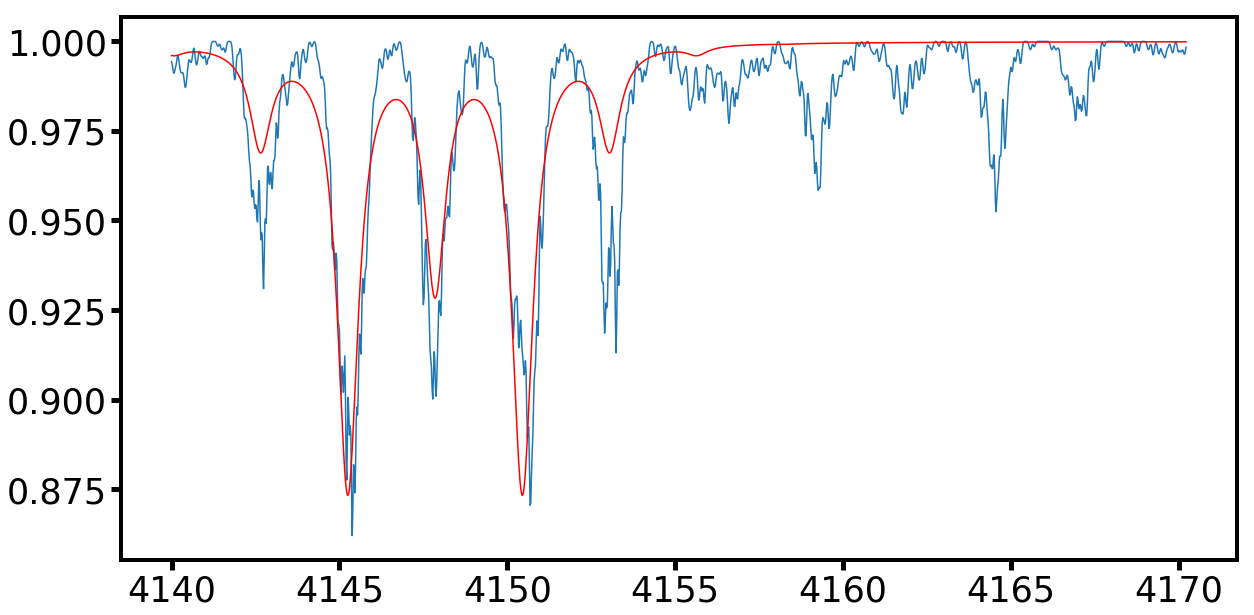

In [66]:
%matplotlib inline
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 20, 10
from scipy.optimize import curve_fit
from scipy.special import jv as bessel
from scipy.ndimage import gaussian_filter

data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/12.dir/2020_12_01.dir/00247 - E2LaserSweep_prob.csv', delimiter = ',')
order = 8
omega_RF = 2.6
omega_l = 4147.85
freq = data[:,0] 
prob = gaussian_filter(data[:,1], sigma = 1.5)
#prob = data[:,1]
p0 = [5, 1, 1]

def sidebands(x, A, beta, gamma):
    P = np.zeros(len(freq))
    for i in range(-order, order):
        P = P +  A*bessel(i,beta)**2/((x - omega_l +  i*omega_RF)**2 + (gamma/2)**2)
    return 1 - P


fit, err = curve_fit(sidebands,freq, prob, p0)

print fit 

y_fit = sidebands(freq, fit[0], fit[1], fit[2])

#xlim([4142,4146])
plot(freq, prob)
plot(freq, y_fit, color = 'r')
tick_params(labelsize = 35)
tick_params(width=5, length=10)
show()